In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [34]:
crypto_cur = "BTC"
against_cur = "USD"

In [35]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [36]:
data = web.DataReader(f'{crypto_cur}-{against_cur}', 'yahoo', start, end)

In [37]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900.0,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600.0,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800.0,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500.0,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600.0,431.959991


In [38]:
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

In [40]:
prediction_days = 60

In [41]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], 1))

In [46]:
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1) ))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs = 25, batch_size=32)

Epoch 1/25
66/66 [==============================] - 9s 40ms/step - loss: 0.0058
Epoch 2/25
66/66 [==============================] - 3s 41ms/step - loss: 0.0025
Epoch 3/25
66/66 [==============================] - 3s 42ms/step - loss: 0.0018
Epoch 4/25
66/66 [==============================] - 3s 44ms/step - loss: 0.0020
Epoch 5/25
66/66 [==============================] - 3s 42ms/step - loss: 0.0021
Epoch 6/25
66/66 [==============================] - 3s 43ms/step - loss: 0.0020
Epoch 7/25
66/66 [==============================] - 3s 42ms/step - loss: 0.0017
Epoch 8/25
66/66 [==============================] - 3s 42ms/step - loss: 0.0019
Epoch 9/25
66/66 [==============================] - 3s 48ms/step - loss: 0.0016
Epoch 10/25
66/66 [==============================] - 3s 45ms/step - loss: 0.0015
Epoch 11/25
66/66 [==============================] - 3s 44ms/step - loss: 0.0016
Epoch 12/25
66/66 [==============================] - 3s 45ms/step - loss: 0.0021
Epoch 13/25
66/66 [==================

In [47]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [48]:
test_data = web.DataReader(f'{crypto_cur}-{against_cur}', 'yahoo', test_start, test_end)
actual_prices = test_data["Close"].values

In [49]:
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis=0)

In [51]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [52]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

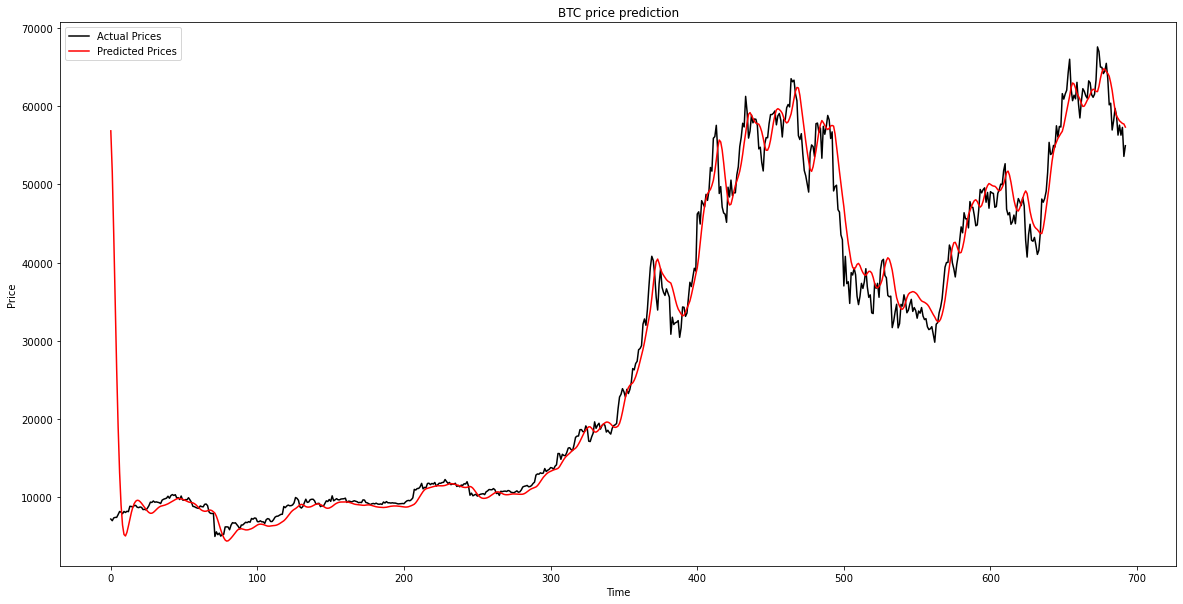

In [57]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color = "black", label = "Actual Prices")
plt.plot(prediction_prices, color = "red", label = "Predicted Prices")
plt.title(f'{crypto_cur} price prediction')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = (40, 20)
plt.show()

In [66]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [68]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[56833.527]]
